<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/Vera_Mendes_DS8_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-10 14:40:09--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.98.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.98.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.2MB/s    in 6.2s    

2019-09-10 14:40:16 (31.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [0]:
# checking df aisles.csv
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# checking df departments.csv
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
#  checking df order_products__prior.csv
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
# checking df order_products__train.csv
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
# checking df orders.csv
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
# checking df products.csv
products = pd.read_csv('products.csv')
print(products.shape)
products.head(10)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [0]:
# I want to take product_name and product_id

In [0]:
# df order_products__prior.csv and order_products__train.csv have 'product_id'
# df products.csv has 'product_name' & 'product_id'

In [10]:
# 1st concatenating order_products__prior & order_products__train and looking into its shape
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)

(33819106, 4)


In [14]:
# checking new dataframe
order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [0]:
# using only dfs :'order_products.csv' & 'products.csv'

In [0]:
# defining columns I need:
columns_order_products = ['product_id']
columns_products = ['product_id', 'product_name']

In [0]:
# subset of order_products

subset_OP = order_products.loc[:, (columns_order_products)]
subset_OP.head()

,product_id
0,33120
1,28985
2,9327
3,45918
4,30035


In [0]:
# subset of products

subset_P = products.loc[:, (columns_products)]
subset_P.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [0]:
# merging subset_OP & subset_P
new_df = pd.merge(subset_OP,subset_P, how='inner', on='product_id' )
new_df.head(10)

,product_id,product_name
0,33120,Organic Egg Whites
1,33120,Organic Egg Whites
2,33120,Organic Egg Whites
3,33120,Organic Egg Whites
4,33120,Organic Egg Whites
5,33120,Organic Egg Whites
6,33120,Organic Egg Whites
7,33120,Organic Egg Whites
8,33120,Organic Egg Whites
9,33120,Organic Egg Whites


In [0]:
# finding ten most frequently ordered products 

n = 10
final_df = new_df['product_name'].value_counts()[:n]

In [0]:
print(final_df)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64


## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [0]:
print(table1)

              treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1


In [0]:
print(table2)

            John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0


In [0]:
#  assigning and reseting index
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
#  tidying data creating a variable with two different possibilities
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# renaming columns
tidy = tidy.rename(columns={
                            'index': 'name', 
                            'variable': 'trt', 
                            'value': 'result'
})

tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# removing treatment on the variable observations
tidy.trt = tidy.trt.str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
# looking at table2
print(table2)

            John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0


In [0]:
# reset of index
table3 = table2.reset_index()
table3

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
# defining index as id_vars
table4 = table3.melt(id_vars='index')
table4

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# renaming columns 
table5 = table4.rename(columns = {'index': 'treatment', 'variable': 'name',  'value': 'result'})

table5

,treatment,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# setting up my column order
table6 = table5[['name', 'treatment', 'result']]
table6

,name,treatment,result
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# removing extra repeated info on the treatment column
table6.treatment = table6.treatment.str.replace('treatment', '')

table6

,name,treatment,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [0]:
# process back to table 2

table7 = table6.pivot(index='treatment', columns='name', values='result')
table7

name,Jane Doe,John Smith,Mary Johnson
treatment,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
# loading flights
flights = sns.load_dataset('flights')

In [0]:
# checking for data shape
flights.shape

(144, 3)

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
# new dataset using pivot to reshape
flights_reshaped = flights.pivot(index='year', columns='month', values='passengers')
flights_reshaped

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [11]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
merged

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11
5,9434,Bag of Large Lemons,1107,11
6,12078,Shredded Mexican Blend Cheese,1107,11
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
9,24532,Cranberry Almond Chicken Salad,1107,11


In [37]:
# subset of merged
columns_merged = ['product_name', 'order_hour_of_day']
subset = merged.loc[:, (columns_merged)]
subset.head()

,product_name,order_hour_of_day
0,Chocolate Sandwich Cookies,11
1,Sliced American Cheese,11
2,Clementines,11
3,Packaged Grape Tomatoes,11
4,Frosted Flakes,11


In [38]:
subset.shape

(33819106, 2)

In [66]:
# creating a new column 'Counts' that sums the number of products ordered
subset['Counts'] = subset.groupby(['product_name'])['product_name'].transform('count')

subset.head()

,product_name,order_hour_of_day,Counts
0,Chocolate Sandwich Cookies,11,1928
1,Sliced American Cheese,11,547
2,Clementines,11,32194
3,Packaged Grape Tomatoes,11,13965
4,Frosted Flakes,11,2737


In [67]:
# defining the popular products
condition = subset['Counts'] >2900

subset = subset[condition]

subset.head()

,product_name,order_hour_of_day,Counts
2,Clementines,11,32194
3,Packaged Grape Tomatoes,11,13965
6,Shredded Mexican Blend Cheese,11,4036
7,Bag of Organic Bananas,11,394930
8,Strawberries,11,149445


In [72]:
# selecting the top 25 most popular based on latest hour of the day
# used drop duplicate as there were some latest products ordered in the same lastest hour, so they appeared twice

top_25_latest_popular_products = subset.drop_duplicates('product_name').nlargest(25,'order_hour_of_day')
             
top_25_latest_popular_products.head(25)

,product_name,order_hour_of_day,Counts
842,Popcorn,23,7102
2921,Lightly Salted Baked Snap Pea Crisps,23,25941
9410,Bosc Pear,23,5982
9441,Organic Nectarine,23,13189
10560,Hearty Thick Cut Bacon,23,3332
10597,90% Lean Ground Beef,23,7076
10604,Family Size Naturally Flavored Whole Grain Oat...,23,4169
20474,Angel Hair Pasta,23,6633
20475,Organic 85% Cacao Dark Chocolate Bar,23,5693
20493,Cold Brew Coffee,23,9243


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
# From first option, I am selecting more products to replicate on the plot

In [0]:
# selecting products from column 'product_name'

popcorn = subset[subset['product_name']=='Popcorn']
clementines = subset[subset['product_name']=='Clementines']
apples = subset[subset['product_name']=='Apples']
trail_mix = subset[subset['product_name']=='Trail Mix']

milk_and_cookies_icecream = subset[subset['product_name']=='Milk and Cookies Ice Cream']
mint_chip = subset[subset['product_name']=='Mint Chip']
pepperoni_pizza = subset[subset['product_name']=='Rising Crust Pepperoni Pizza']
sicilian_pistachio = subset[subset['product_name']=='Sicilian Pistachio']


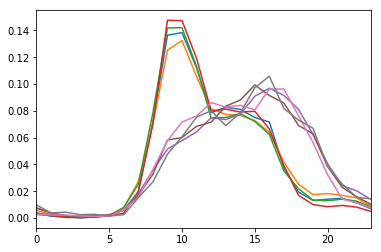

In [85]:
# plotting percentage of products by hour of the day

(popcorn['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(clementines['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(apples['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(trail_mix['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())

(milk_and_cookies_icecream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(mint_chip['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(pepperoni_pizza['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(sicilian_pistachio['order_hour_of_day'].value_counts(normalize=True).sort_index().plot());